# Fraud Detection in Credit Card Transactions

## In this project, we aim to develop a machine learning model to detect fraudulent credit card transactions. Using a dataset of past transactions, we will analyze various features and apply different classification algorithms to identify patterns indicative of fraud. Our goal is to create a reliable and efficient model that can help financial institutions minimize losses due to fraudulent activities. This project will involve data preprocessing, exploratory data analysis, model training, evaluation, and optimization to achieve the best possible performance in fraud detection.


# Let us get started!

## We start by importing the necessary libraries

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline


## Then we read in the data

In [13]:
df = pd.read_csv('/Users/maamounmraish/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Check the shape of our data

In [14]:
df.shape

(284807, 31)

## Check for null values

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## We have no null values which is great! We move on to check for any duplicate values

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(283726, 31)

## After dropping any duplicates we went from 284807 columns to 283726 which means we had over a 1000 duplicates!

## Let us check our columns:

In [18]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Check for unique values

In [19]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

## Correlation Analysis

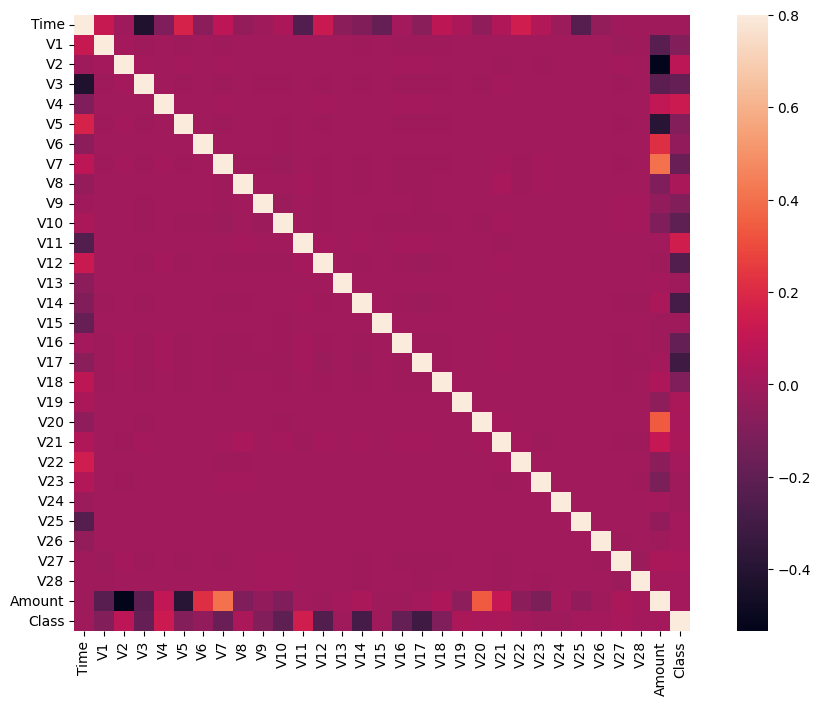

In [20]:
corr=df.corr()
fig=plt.figure(figsize=(12,8))
sns.heatmap(corr,vmax=.8,square=True)
plt.show()


## Check Statistical Summary of Data:

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Let us see how our data is split between fraudulant and valid transaction 

In [22]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

print(f'Number of Fraudulant Transactions: {len(fraud)}')
print(f'Number of Valid Transactions: {len(valid)}')

Number of Fraudulant Transactions: 473
Number of Valid Transactions: 283253


## Interesting, our data has WAY more cases of valid transactions than fraudulant ones. Lets visualize this difference

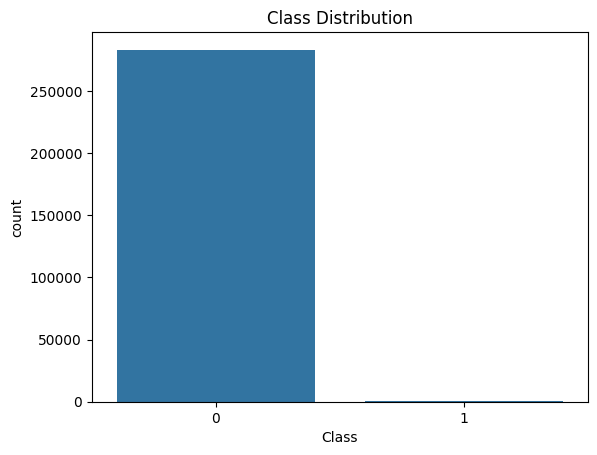

In [23]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

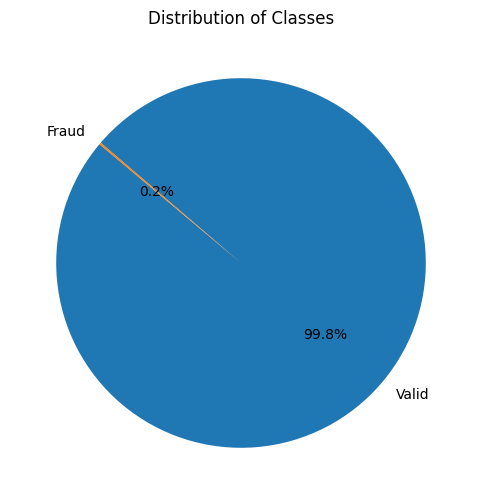

In [24]:
# First, get the counts of each category in the 'Class' column
class_counts = df['Class'].value_counts()

# Create a mapping for renaming
index_mapping = {0: 'Valid', 1: 'Fraud'}

# Rename the index for plotting only
class_counts_renamed = class_counts.rename(index=index_mapping)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts_renamed, labels=class_counts_renamed.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.show()

## As you can see we have a very imbalanced data set which we must address. 
## Handling imbalanced datasets is crucial because:

## Model Performance: Imbalances can lead to biased models that favor the majority class, resulting in poor performance on the minority class.
## Accuracy Misleading: High accuracy in imbalanced datasets may not reflect the model’s effectiveness in predicting the minority class. 
## Real-world Relevance: In many cases, the minority class is of higher importance such as in this case of fraud detection, so it’s vital to ensure the model performs well across all classes. 
## Balancing helps in achieving more reliable and fair models.

##  Different Methods To Deal With An Imbalanced Data Set

### 1. Resampling Techniques

#### **Oversampling (e.g., SMOTE)**
Generates synthetic samples for the minority class to balance the dataset.

- **When to Use**: Useful when the minority class has very few samples.
- **Pros**: Can improve model performance by providing more data for the minority class.
- **Cons**: May lead to overfitting if not used carefully.

#### **Undersampling**
Reduces the number of samples in the majority class to balance the dataset.

- **When to Use**: Useful when the majority class has a large number of samples, and the minority class has too few.
- **Pros**: Reduces the computational burden by decreasing the size of the dataset.
- **Cons**: May lead to loss of valuable information.

### 2. Hybrid Methods (e.g., SMOTE + Tomek Links)
Combine oversampling and undersampling techniques to balance the dataset.

- **When to Use**: When you need to balance the dataset while retaining important information.
- **Pros**: Can improve model performance by addressing both overfitting and data imbalance.
- **Cons**: More complex to implement and tune.


### Reason for Choosing the Hybrid Method

I opted for the **hybrid method**, which combines **SMOTE** and **Tomek Links**, to handle the severe class imbalance in my credit card fraud detection system. Specifically, one class has over **20,000 samples**, while the other has only **1,000 samples**. 

This approach effectively balances the dataset by:
- Generating synthetic samples for the minority class (SMOTE)
- Removing noisy and overlapping instances (Tomek Links)

By doing so, it enhances model performance and reduces overfitting while preserving crucial information.


In [25]:
# Dealing with the imbalances using a hybrid method
X = df.drop(columns=['Class'])
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Define SMOTE and Tomek Links
smote = SMOTE(sampling_strategy='auto',random_state=42)
tomek_links = TomekLinks()

pipeline = Pipeline([
    ('smote',smote), #Apply smote
    ('tomek', tomek_links) #Apply tomek_links
     ])

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)


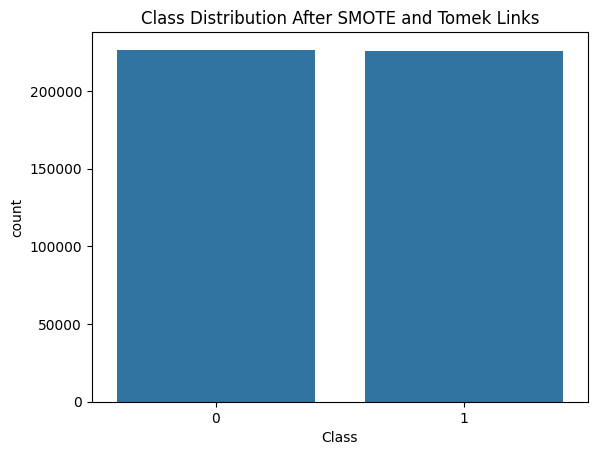

In [26]:
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Class'] = y_resampled

# Plot the class distribution
sns.countplot(x='Class', data=df_resampled)
plt.title('Class Distribution After SMOTE and Tomek Links')
plt.show()

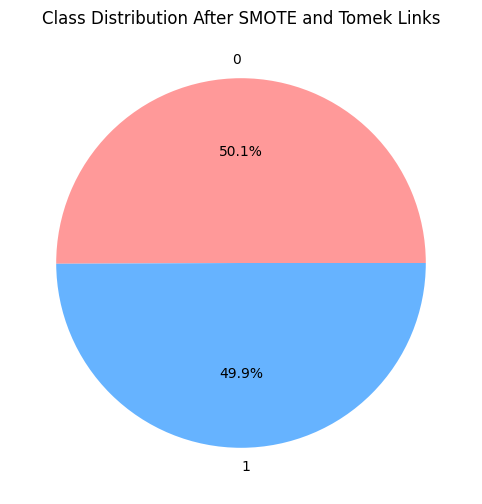

In [27]:
# Aggregate class counts
class_counts = df_resampled['Class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Class Distribution After SMOTE and Tomek Links')
plt.show()

## As you can see from the pie chart and the bar chart above, The data is now balanced!

In [28]:
fraud = df_resampled[df_resampled['Class'] == 1]
valid = df_resampled[df_resampled['Class'] == 0]

print(f'Number of Fraudulant Transactions: {len(fraud)}')
print(f'Number of Valid Transactions: {len(valid)}')

Number of Fraudulant Transactions: 225994
Number of Valid Transactions: 226597


## We now have a much more even split between the number of valid and fraudulant transactions

## We will now take care of feature scaling: 

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

## Feature Selection:

In [30]:
selector = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
selector.fit(X_scaled, y_resampled)

# Use feature importance for feature selection
sfm = SelectFromModel(selector, threshold='median')
sfm.fit(X_scaled, y_resampled)
X_selected = sfm.transform(X_scaled)

# Get selected feature names
selected_features = X.columns[sfm.get_support()]

print(f'Original number of features: {X.shape[1]}')
print(f'Selected number of features: {X_selected.shape[1]}')
print('Selected features:', selected_features)

Original number of features: 30
Selected number of features: 15
Selected features: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14',
       'V16', 'V17', 'V18', 'V21'],
      dtype='object')


## Random Forest CLassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45311
           1       1.00      1.00      1.00     45208

    accuracy                           1.00     90519
   macro avg       1.00      1.00      1.00     90519
weighted avg       1.00      1.00      1.00     90519

Confusion Matrix:
[[45294    17]
 [    1 45207]]


## Model Evaluation

In [36]:
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))

The accuracy is 0.999801146720578
The precision is 0.9996240934017336
The recall is 0.9999778800212352
The F1-Score is 0.9998009554140127


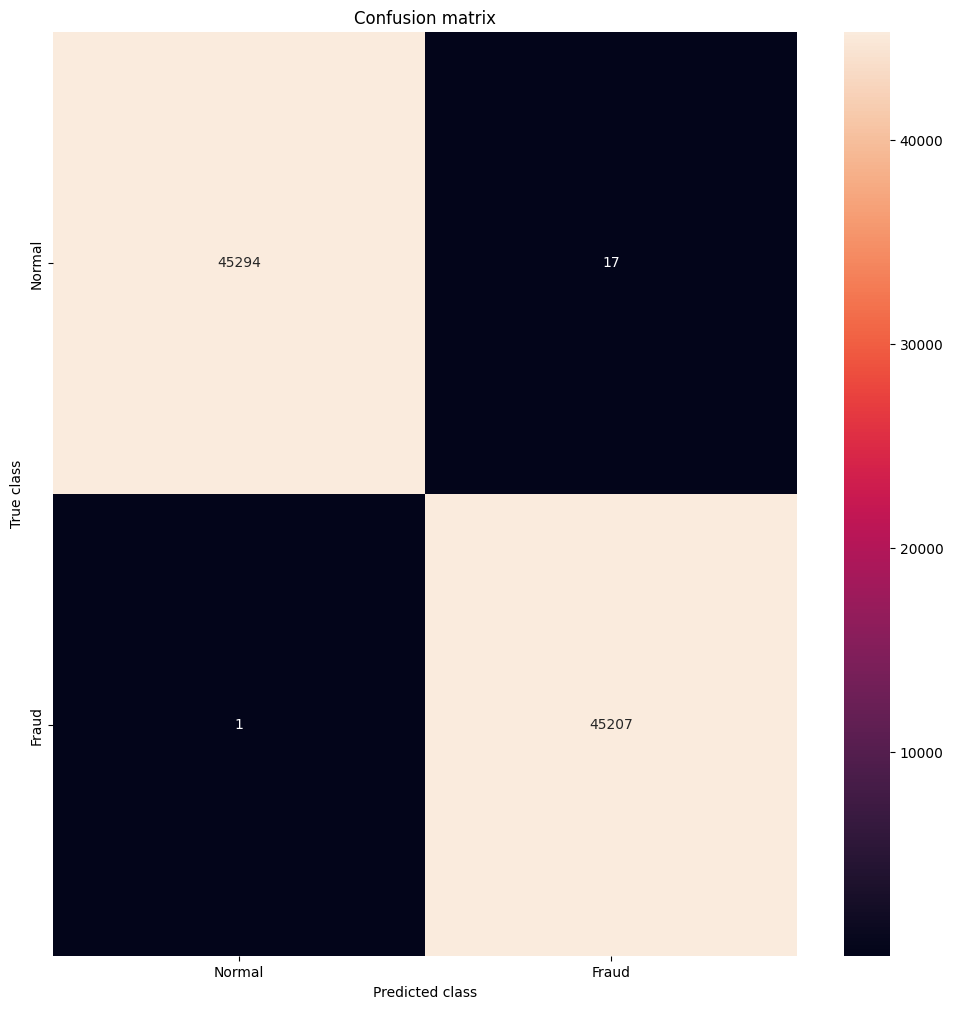

In [37]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred )
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()